In [1]:
import pandas as pd
# crime_df = pd.read_csv('../data/crimeSeoul.csv', encoding='cp949')
crime_df = pd.read_csv('../data/crimeSeoul.csv',sep=',',engine='python',encoding='euc-kr')

In [2]:
crime_df.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [3]:
police_df = pd.read_csv('../data/police.csv', sep=',',engine='python',encoding='euc-kr')

In [4]:
police_df.head()

,청,서,지구대파출소,X좌표,Y좌표,주소
0,강원청,강릉경찰서,강동파출소,128.978300,37.727760,강원도 강릉시 강동면 안인리 764-1
1,강원청,강릉경찰서,강릉경찰서,128.906763,37.768700,강릉시 포남동 1113
2,강원청,강릉경찰서,남부지구대,128.897125,37.748968,강릉시 노암동 715-16
3,강원청,강릉경찰서,동부지구대,128.926315,37.774032,강릉시 송정동 740-3
4,강원청,강릉경찰서,북부지구대,128.875237,37.835265,강릉시 주문진읍 주문리 312-7


In [5]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   청       2264 non-null   object 
 1   서       2264 non-null   object 
 2   지구대파출소  2264 non-null   object 
 3   X좌표     2264 non-null   float64
 4   Y좌표     2264 non-null   float64
 5   주소      2264 non-null   object 
dtypes: float64(2), object(4)
memory usage: 106.2+ KB


In [6]:
#필요한 데이터만 가져옴

In [7]:
police_df1 = police_df[police_df['청'] == '서울청']

In [8]:
police_df1

,청,서,지구대파출소,X좌표,Y좌표,주소
1207,서울청,서울강남경찰서,논현1파출소,127.029316,37.513791,강남구 논현동 58-13
1208,서울청,서울강남경찰서,논현2파출소,127.033875,37.515220,강남구 논현동 89-13
1209,서울청,서울강남경찰서,삼성1파출소,127.060440,37.514852,강남구 삼성동 107-3
1210,서울청,서울강남경찰서,삼성2파출소,127.048063,37.511289,강남구 삼성동 114-6
1211,서울청,서울강남경찰서,서울강남경찰서,127.067177,37.509036,강남구 대치동 998
...,...,...,...,...,...,...
1476,서울청,서울혜화경찰서,종로5가파출소,127.001606,37.570727,종로구 종로5가 138-1
1477,서울청,서울혜화경찰서,창신파출소,127.013702,37.578482,종로구 창신3동 23-373호
1478,서울청,서울혜화경찰서,혜화파출소,127.001422,37.586135,종로구 혜화동 93-1
1479,서울청,서울혜화경찰서,효제파출소,127.003606,37.574259,종로구 충신동 105번지


In [9]:
# crime_df['관서명'] = crime_df['관서명'].str.replace('서','경찰서')
# crime_df['관서명'] = '서울' + crime_df['관서명']
nameresult = []
for temp in crime_df['관서명']:
    nameresult.append('서울'+ temp[:-1] + '경찰서')
crime_df['관서명'] = nameresult


#여기까지만 하고 지도로 넘어감
crimepolicedf = crime_df

In [10]:
crime_df.head(1)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,서울중부경찰서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"


In [11]:
police_df1.head(1)

,청,서,지구대파출소,X좌표,Y좌표,주소
1207,서울청,서울강남경찰서,논현1파출소,127.029316,37.513791,강남구 논현동 58-13


In [12]:
gudata = []

for temp in crime_df['관서명']:
    gudata.append(police_df1.loc[police_df1['지구대파출소']==temp, :].주소.str.split(' ').values[0][0])
    
gudata

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '금천구',
 '중랑구',
 '강남구',
 '관악구',
 '강서구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [13]:
gudata =[]
for temp in crime_df['관서명']:
    tempa = police_df1.loc[police_df1['지구대파출소']==temp,:].주소
    tempb = tempa.str.split(' ').values
    gudata.append(tempb[0][0])
    
gudata

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '금천구',
 '중랑구',
 '강남구',
 '관악구',
 '강서구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [14]:
crime_df['구'] = gudata

In [15]:
crime_df.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구
0,서울중부경찰서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,서울종로경찰서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,서울남대문경찰서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서울서대문경찰서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,서울혜화경찰서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [16]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
 11  구       31 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.0+ KB


In [17]:
crime_df['절도 발생'] = crime_df['절도 발생'].str.replace(',','')
crime_df['절도 발생'] = crime_df['절도 발생'].astype('int')

In [18]:
crime_df['절도 검거'] = crime_df['절도 검거'].str.replace(',','')
crime_df['절도 검거'] = crime_df['절도 검거'].astype('int')

In [19]:
crime_df['폭력 발생'] = crime_df['폭력 발생'].str.replace(',','')
crime_df['폭력 발생'] = crime_df['폭력 발생'].astype('int')

In [20]:
crime_df['폭력 검거'] = crime_df['폭력 검거'].str.replace(',','')
crime_df['폭력 검거'] = crime_df['폭력 검거'].astype('int')

In [21]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int32 
 8   절도 검거   31 non-null     int32 
 9   폭력 발생   31 non-null     int32 
 10  폭력 검거   31 non-null     int32 
 11  구       31 non-null     object
dtypes: int32(4), int64(6), object(2)
memory usage: 2.5+ KB


In [22]:
crime_df = crime_df.groupby('구').sum()

In [23]:
a = crime_df[['살인 발생','살인 검거']]
a

,살인 발생,살인 검거
구,,
강남구,13,10
강동구,4,3
강북구,7,8
강서구,7,8
관악구,9,8
광진구,4,4
구로구,8,6
금천구,3,4
노원구,10,10


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='NanumGothic')
    #Malgun 
%matplotlib inline

<AxesSubplot:title={'center':'서울시 구별 살인 발생 및 검거 현황'}, xlabel='구'>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49332 missing from c

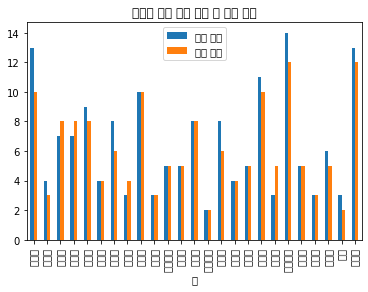

In [25]:
a.plot(kind='bar', title='서울시 구별 살인 발생 및 검거 현황')

In [26]:
crimepolicedf.head(1)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구
0,서울중부경찰서,2,2,3,2,105,65,1395,477,1355,1170,중구


In [27]:
police_df.head(1)

,청,서,지구대파출소,X좌표,Y좌표,주소
0,강원청,강릉경찰서,강동파출소,128.9783,37.72776,강원도 강릉시 강동면 안인리 764-1


In [28]:
xlist = []
ylist = []
for temp in crimepolicedf['관서명']:
    temp1 = police_df1.loc[police_df1['지구대파출소']==temp,:]['X좌표'].values[0]
    temp2 = police_df1.loc[police_df1['지구대파출소']==temp,:]['Y좌표'].values[0]

    xlist.append(temp1)
    ylist.append(temp2)
    
crimepolicedf['X좌표'] = xlist
crimepolicedf['Y좌표'] = ylist

In [29]:
crimepolicedf.head(3)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구,X좌표,Y좌표
0,서울중부경찰서,2,2,3,2,105,65,1395,477,1355,1170,중구,126.989614,37.563514
1,서울종로경찰서,3,3,6,5,115,98,1070,413,1278,1070,종로구,126.984875,37.575658
2,서울남대문경찰서,1,0,6,4,65,46,1153,382,869,794,중구,126.973488,37.554767


In [30]:

crimepolicedf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   관서명     31 non-null     object 
 1   살인 발생   31 non-null     int64  
 2   살인 검거   31 non-null     int64  
 3   강도 발생   31 non-null     int64  
 4   강도 검거   31 non-null     int64  
 5   강간 발생   31 non-null     int64  
 6   강간 검거   31 non-null     int64  
 7   절도 발생   31 non-null     int32  
 8   절도 검거   31 non-null     int32  
 9   폭력 발생   31 non-null     int32  
 10  폭력 검거   31 non-null     int32  
 11  구       31 non-null     object 
 12  X좌표     31 non-null     float64
 13  Y좌표     31 non-null     float64
dtypes: float64(2), int32(4), int64(6), object(2)
memory usage: 3.0+ KB


In [31]:
crimepolicedf['절도 발생'] = crimepolicedf['절도 발생'].str.replace(',','').astype('int')
crimepolicedf['폭력 발생'] = crimepolicedf['폭력 발생'].str.replace(',','').astype('int')

AttributeError: Can only use .str accessor with string values!

In [32]:
crimepolicedf['범죄 합계'] = crimepolicedf['살인 발생'] + crimepolicedf['폭력 발생'] + crimepolicedf['절도 발생'] + crimepolicedf['강간 발생'] + crimepolicedf['강도 발생']


In [33]:
crimepolicedf.head(3)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구,X좌표,Y좌표,범죄 합계
0,서울중부경찰서,2,2,3,2,105,65,1395,477,1355,1170,중구,126.989614,37.563514,2860
1,서울종로경찰서,3,3,6,5,115,98,1070,413,1278,1070,종로구,126.984875,37.575658,2472
2,서울남대문경찰서,1,0,6,4,65,46,1153,382,869,794,중구,126.973488,37.554767,2094


In [35]:
import folium

center = [37.541 , 126.986]#지도의 중심을 넣어준다.
mapdata = folium.Map(location=center, zoom_start = 12)

for temp in crimepolicedf.index:
    folium.Circle(
        [crimepolicedf['Y좌표'][temp], crimepolicedf['X좌표'][temp]],
        radius = int(crimepolicedf.loc[temp,['범죄 합계']].values[0] / 5),color='#3185cc',fill_color='#3185cc'
        
    ).add_to(mapdata) #지도에 원을 다 더해라
mapdata